# <center> The Use of NLP and Deep Learning on News Headlines to Predict Stock Movements <center/>

<a href='https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI'><img src='img/DJIA_closing_prices.png' width="600" height="400"/></a>

### Table of Contents

1. <a href="#1.-Data-Preparation">Data Preparation</a> <br>
    1.1 <a href="#1.1-Packages-to-be-Imported">Packages to be Imported</a> <br>
    1.2 <a href="#1.2-General-Info-about-the-Dataset">General Info about the Dataset</a> <br>
    1.3 <a href="#1.3-Text-Preprocessing">Text Preprocessing</a> <br>
    1.4 <a href="#1.4-Splitting-Data-into-Train-and-Test-Sets">Splitting Data into Train and Test Sets</a> <br>
<br>    
2. <a href="#2.-Model-Evaluation">Model Evaluation</a> <br>
    2.1 <a href="#2.1-Model-Evaluation-Function">Model Evaluation Function</a> <br>
    2.2 <a href="#2.2-Plotting-ROC-Curve">Plotting ROC Curve</a> <br>
<br>
3. <a href="#3.-Model-Building">Model Building</a> <br>
    3.1 <a href="#3.1-Logistic-Regression">Logistic Regression</a> <br>
    3.2 <a href="#3.2-Multinomial-Naive-Bayes">Multinomial Naive Bayes</a> <br>
    3.3 <a href="#3.3-Random-Forest-Classifier">Random Forest Classifier</a> <br>
    3.4 <a href="#3.4-Support-Vector-Machine-Classifier-(SVM)">Support Vector Machine Classifier (SVM)</a> <br>
    3.5 <a href="#3.5-XGBoost-Classifier">XGBoost Classifier</a> <br>
    3.6 <a href="#3.6-Bernouilli-Naive-Bayes">Bernouilli Naive Bayes</a> <br>
    3.7 <a href="#3.7-Deep-Learning">Deep Learning</a> <br>
    3.7.1 <a href="#3.7.1-Multilayer-Perceptron-(MLP)">Multilayer Perceptron (MLP)</a> <br>
    3.7.2 <a href="#3.7.2-Recurrent-Nueral-Network-(RNN)---LTSM">Recurrent Nueral Network (RNN) - LSTM</a> <br>
    3.7.3 <a href="#3.7.3-Convolutional-Neural-Network-(CNN)">Convolutional Neural Network (CNN)</a> <br>
<br>
4. <a href="#4.-Model-Tuning">Model Tuning</a> <br>
<br>
5. <a href="#5.-Conclusion">Conclusion</a>

##### About the Dow Jones Industrial Average (DJIA):

The Dow Jones Industrial Average (DJIA) is a stock market index that tracks the stock performance of 30 large, publicly owned companies (blue-chip companies) listed on stock exchange in the United States (See the companies listed in DJIA below).  

#### <center> Components of the Dow Jones as of April 6, 2020 <center/>

|Company Name|Ticker|Exchange|                                         |Company Name|Ticker|Exchange|
|:- |:-:|:-:|                                                          |:-|:-:|:-:|
|3M Company|MMM|NYSE|                                                  |JPMorgan Chase & Co.|JPM|NYSE|
|American Express Company|AXP|NYSE|                                    |McDonald's Corporation|MCD|NYSE|
|Apple Inc.|AAPL|NASDAQ|                                               |Merck & Co., Inc.|MRK|NYSE|
|Boeing Company|BA|NYSE|                                               |Microsoft Corporation|MSFT|NASDAQ|  
|Caterpillar Inc.|CAT|NYSE|                                            |Nike, Inc.|NKE|NYSE|
|Chevron Corporation|CVX|NYSE|                                         |Pfizer Inc.|PFE|NYSE|
|Cisco Systems, Inc.|CSCO|NASDAQ|                                      |The Procter & Gamble Company|PG|NYSE|
|The Coca-Cola Company|KO|NYSE|                                        |Raytheon Technologies|RTX|NYSE|
|Dow Chemical Company|DOW|NYSE|                                        |The Travelers Companies, Inc.|TRV|NYSE|
|Exxon Mobil Corporation|XOM|NYSE|                                     |UnitedHealth Group Inc.|UNH|NYSE|
|The Goldman Sachs Group, Inc.|GS|NYSE|                                |Verizon Communications, Inc.|VZ|NYSE|    
|The Home Depot, Inc.|HD|NYSE|                                         |Visa Inc.|V|NYSE|
|Intel Corporation|INTC|NASDAQ|                                        |Walgreens Boots Alliance, Inc.|WBA|NASDAQ|
|International Business Machines Corporation|IBM|NYSE|                 |Walmart Inc.|WMT|NYSE|
|Johnson & Johnson|JNJ|NYSE|                                           |The Walt Disney Company|DIS|NYSE|

##### Problem Statement:

A significant number of companies in the financial services and banking industry have long spent millions of dollars and dedicated a vast amount of resources to quantify and analyze qualitative data from a variety of media outlets in order to gain valuable information in making investment decisions. This project attempts to demonstrate the viability of the use of natural language processing techniques to extract information from Reddit news headlines to predict stock movements. Prior studies and projects have shown how useful natural language processing word embeddings extracted from the social media outlets such as Twitter and Facebook are in predicting stock prices. In this respect, this particular project builds upon the past work by using the NLP word embeddings and various deep learning neural network architectures to predict the movements of the Dow Jones index in the U.S. stock market.

##### About the Dataset:

The data for this project were acquired from the Kaggle.com. Two sets of datasets were  available for Reddit historical news headlines and Dow Jones Industrial Average (DJIA) stock data. The data for the news headlines were crawled from Reddit WorldNews channel (r/worldnews). Only the top 25 news headlines were considered for a single date. The DJIA stock data were downloaded directly from the Yahoo Finance. The combined dataset includes a date column and a label column along with 25 news headlines columns. The 'Label' column is the target feature and consists of the values of 0 and 1. While 1 indicates that the DJIA adjusted close value stayed the same or goes up on that date, 0 represents that it fell on that particular date. 

The complete dataset used for this project can be acquired using the following link:
https://www.kaggle.com/aaron7sun/stocknews

# 1. Data Preparation

It is extremely important that we preprocess the data before feeding it into our model as the quality of data and the useful information that can be derived from the data directly affects the ability of our model to learn. This section includes the packages to be used throughout this project, the general info about the dataset, text preprocessing steps, and splitting data into train and test sets.

### 1.1 Packages to be Imported

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from tqdm import tqdm

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler

from xgboost import XGBClassifier

from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Convolution1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import backend as K

import os
import random
from numpy.random import seed
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Select 300 best features
chi_k = 10000

%matplotlib inline

Using TensorFlow backend.


### 1.2 General Info about the Dataset

First, we start with reading the data into a dataframe.

In [2]:
# Read in the data and print the head.
data = pd.read_csv('data/Combined_News_DJIA.csv')
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

The Label feature is currently in the second column. To have better view of the dataframe, let's move it to the end of the dataframe.

In [3]:
# Move the Label feature to the end of the dataframe.
columns = list(data.columns)
columns.append(columns.pop(columns.index('Label')))
data = data.loc[:, columns]
data.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Label
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",0
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",1


Now, we check the shape of our dataset. The entire dataset includes a total of 1989 rows and 27 features/columns.

In [4]:
# Check shape of dataset.
data.shape

(1989, 27)

The features in our dataset printed below. There are a total of 27 features. Label feature is the target variable, while the features start with "Top" are the predictor variables. As a reminder, the Label feature has values of 0 and 1. While 1 indicates that the DJIA adjusted close value stayed the same or goes up on that date, 0 represents that it fell on that particular date.

In [5]:
data.columns

Index(['Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8',
       'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16',
       'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24',
       'Top25', 'Label'],
      dtype='object')

It is always extremely useful to have a better insight about the data types of the features. Except the Label feature, all the features have object data type. We can convert the Date feature to a datetime object, but it is not necessary. So we will keep it in that way.

In [6]:
# print the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Top1    1989 non-null   object
 2   Top2    1989 non-null   object
 3   Top3    1989 non-null   object
 4   Top4    1989 non-null   object
 5   Top5    1989 non-null   object
 6   Top6    1989 non-null   object
 7   Top7    1989 non-null   object
 8   Top8    1989 non-null   object
 9   Top9    1989 non-null   object
 10  Top10   1989 non-null   object
 11  Top11   1989 non-null   object
 12  Top12   1989 non-null   object
 13  Top13   1989 non-null   object
 14  Top14   1989 non-null   object
 15  Top15   1989 non-null   object
 16  Top16   1989 non-null   object
 17  Top17   1989 non-null   object
 18  Top18   1989 non-null   object
 19  Top19   1989 non-null   object
 20  Top20   1989 non-null   object
 21  Top21   1989 non-null   object
 22  Top22   1989 non-null   

Let's check for the missing data. To do so, we use a package called `missingno`, which gives us a quick visual view of the completeness of the data. 

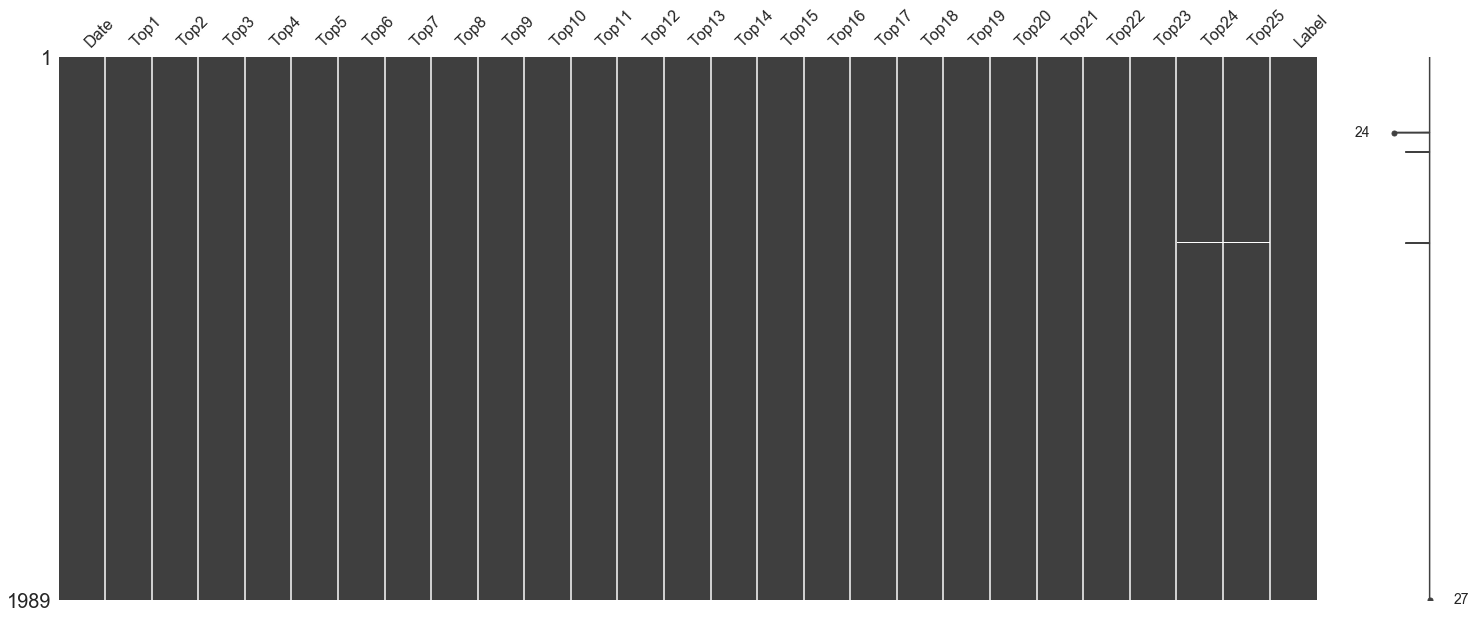

In [7]:
# First, we check for the missing data.
import missingno as msno
msno.matrix(data)

plt.show()

It is clear that there is only a few number of rows with missing values.

Lastly, we look for the individual value counts for the target feature. The Label feature has almost equal number of 1 and 0s, indicating the dataset is balanced. During this period, 1065 times the stock prices for DJIA either stayed the same or went up, whereas 924 times went down.  

In [8]:
data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

### 1.3 Text Preprocessing

Now that the data is loaded in and we checked the quality of data, we need to preprocess the text data to prepare it for the rest of the analysis. The following text preprocessing steps will be taken in a function below:
1. Lowercasing 
2. Removing unwanted tokens (alpha-numeric tokens will be beneficial)
3. Lemmatization

In [9]:
# Download 'stopwords' and 'wordnet' from the nltk library
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Define a function to preprocess the text data
def text_preprocess(text):
    """
    Takes a string of text and performs the following:
    1. Tokenize and removes punctuation
    2. Removes stopwords
    3. Lemmatize
    4. Returns a list of preprocessed text
    """
    
    if pd.isnull(text):
        return []
    
    # Retain alphabetic words
    alpha_only = [t for t in word_tokenize(text.lower()) if t.isalpha()]
    
    # Remove all stop words
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    
    # Lemmatize all tokens into a new list
    wordnet_lemmatizer = WordNetLemmatizer()
    text_processed = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    try: 
        text_processed.remove('b')
    except:
        pass
    
    return text_processed

We need to combine text columns for tokenization. So we need a function that turns a list of strings into a single string per row (single vector per row).

In [11]:
NON_TEXT_COLUMNS = data[['Date', 'Label']]

# Define a function to convert rows into single vectors
def combine_text_columns(data_frame, to_drop=NON_TEXT_COLUMNS):
    """ 
    Converts all text in each row of data_frame to single vector
    """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace np.nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

### 1.4 Splitting Data into Train and Test Sets

The last step in our data preparation section is to split data into train and test sets. Per the instructions, we will use all of the dates up until 2014-12-31 as our training set and the following two years as our test set which corresponds to roughly 80% training set and 20% test set.

In [12]:
# Split the data into train and test sets
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [13]:
# Extract the features and the response variables
y_train = train['Label']
X_train = train.drop('Label', axis=1)

y_test = test['Label']
X_test = test.drop('Label', axis=1)

In [14]:
# check the shape of train datasets
print(y_train.shape)
print(X_train.shape)

(1611,)
(1611, 26)


<a href="#Table-of-Contents">Back to Top</a> <br>

***************

# 2. Model Evaluation

This section includes two functions to be used to evaluate model performances in the following section - Model Evaluation Function and Plotting ROC Curve.

### 2.1 Model Evaluation Function

In [15]:
# We will list and compare the different algorithms. 
model_evaluation = []

def Evaluation(model, X_test, y_test, y_pred):
    """
    This function is to produce:
    - Classification report
    - Confusion matrix
    - ROC-AUC score
    """
    # Display the model being used
    print(model, '\n')
    
    # Print the classification report
    print(classification_report(y_test, y_pred))
    
    # Plot the confusion matrix
    sns.set(font_scale=1.4)
    plt.figure(figsize=(8,5))
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', square=True)
    ax.set_xlabel('Predicted Value')
    ax.set_ylabel('Actual Value')
    plt.show()
    
    # Compute and print AUC score
    #y_pred_prob = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC-AUC score: {:.2f}".format(roc_auc))
    
    
    # Append model statistics to model_evaluation list
    Precision=precision_score(y_test,y_pred)
    Accuracy=accuracy_score(y_test,y_pred)
    Recall=recall_score(y_test,y_pred)
    F1=f1_score(y_test,y_pred)
    model_evaluation.append([model, Accuracy, roc_auc, Precision, Recall, F1])

### 2.2 Plotting ROC Curve

In [16]:
def ROCCurve(Actual, Predicted):
    """
    Computes and plots ROC curve and AUC score.
    To plot ROC curves for multi-label classification, see the following link:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """

    # Compute ROC curve and AUC 
    fpr, tpr, threshold = roc_curve(Actual.ravel(), Predicted.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

<a href="#Table-of-Contents">Back to Top</a> <br>

***********

# 3. Model Building

The third section is devoted to build various models. We first start with some advanced models and proceed with the various deep learning model arhictectures for this classification problem. 

The candidates for the model algorithms:
1. Logistic Regression
2. Multinomial Naive Bayes
3. Random Forest Classifier
4. Support Vector Machine Classifier (SVM)
5. XGBoost Classifier
6. Bernoulli Naive Bayes

### 3.1 Logistic Regression

In [17]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object
pl_logreg = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', LogisticRegression())
    ])

# Fit to the training data
pl_logreg.fit(X_train, y_train)

# Predict the labels
y_pred = pl_logreg.predict(X_test)

Logistic Regression 

              precision    recall  f1-score   support

           0       0.55      0.09      0.16       186
           1       0.51      0.93      0.66       192

    accuracy                           0.52       378
   macro avg       0.53      0.51      0.41       378
weighted avg       0.53      0.52      0.41       378



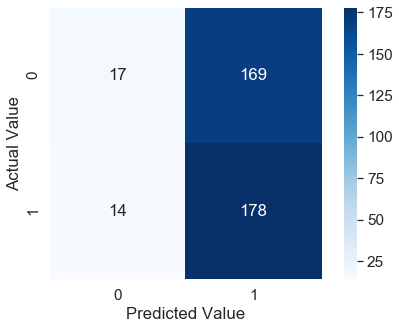

ROC-AUC score: 0.51


In [18]:
Evaluation('Logistic Regression', X_test, y_test, y_pred)

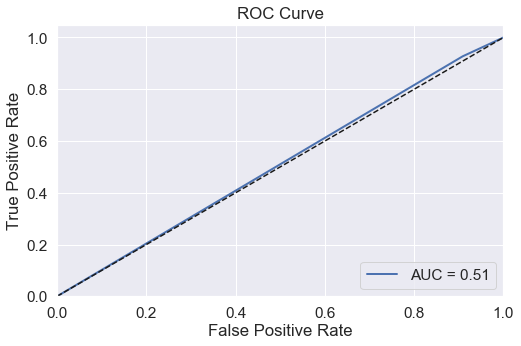

In [19]:
# Plot the ROC curve
ROCCurve(y_test, y_pred)

The dataframe below shows the the top 10 positive and negative coefficients for the features/words after we ran our logistic regression model. Although the top 10 most important words with the highest positive coefficients do not seem to be interesting, those negative ones such as `"military"`, `"hacking"`, `"criminal"`, `"low"`, and `"sanction"` make sense. 

In [20]:
# Since we reduce the dimension with the SelectKBest, extract those indices
inds = pl_logreg.named_steps['dim_red'].get_support(indices=True).tolist()

# Extract all the feature names in our model
words = pl_logreg.named_steps['vectorizer'].get_feature_names()

# Slice the indices above from the all feature names list
words_list = []

for i in tqdm(inds):
    words_list.append(words[i])

# Get the coefficients of the features used in the model
coeffs = pl_logreg.named_steps['classifier'].coef_[0].tolist()

# Create a dataframe from the words and coefficients and sort it
coeffsdf = pd.DataFrame({'Word': words_list, 'Coefficient': coeffs})
coeffsdf = coeffsdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])

# Display the top 10 words with the highest positive coefficients
coeffsdf.head(10)

100%|████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<?, ?it/s]


,Word,Coefficient
6039,nigeria,0.838134
4702,jew,0.711856
7244,record,0.665206
8126,since,0.658388
8469,state,0.652982
7552,right,0.652268
5822,mubarak,0.637640
7959,set,0.621192
8854,tear,0.618313
3272,first,0.601194


In [21]:
# Display the bottom 10 words with the highest negative coefficients
coeffsdf.tail(10)

,Word,Coefficient
4198,hour,-0.685234
5630,military,-0.701698
3849,hacking,-0.703571
9797,without,-0.738987
2013,criminal,-0.761410
5255,low,-0.769787
7746,sanction,-0.794919
1969,country,-0.797061
4592,iran,-0.811182
7666,run,-0.821519


### 3.2 Multinomial Naive Bayes

In [22]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object: pl
pl_mulnb = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', MultinomialNB())
    ])

# Fit to the training data
pl_mulnb.fit(X_train, y_train)

# Predict the labels
y_pred = pl_mulnb.predict(X_test)

Multinomial Naive Bayes 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



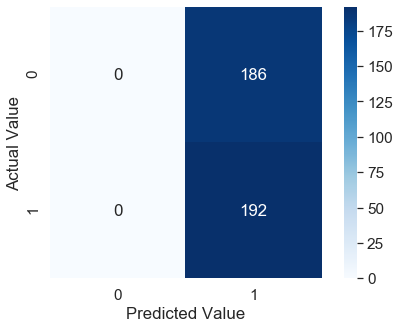

ROC-AUC score: 0.50


In [23]:
Evaluation('Multinomial Naive Bayes', X_test, y_test, y_pred)

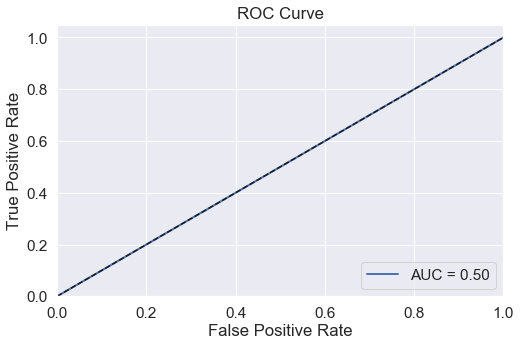

In [24]:
# Plot the ROC curve
ROCCurve(y_test, y_pred)

### 3.3 Random Forest Classifier

In [25]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object: pl
pl_rfc = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', RandomForestClassifier())
    ])

# Fit to the training data
pl_rfc.fit(X_train, y_train)

# Predict the labels
y_pred = pl_rfc.predict(X_test)

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.44      0.19      0.26       186
           1       0.49      0.77      0.60       192

    accuracy                           0.48       378
   macro avg       0.47      0.48      0.43       378
weighted avg       0.47      0.48      0.44       378



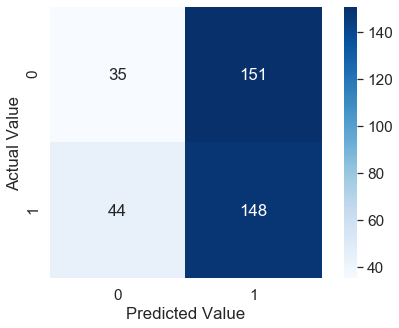

ROC-AUC score: 0.48


In [26]:
Evaluation('Random Forest Classifier', X_test, y_test, y_pred)

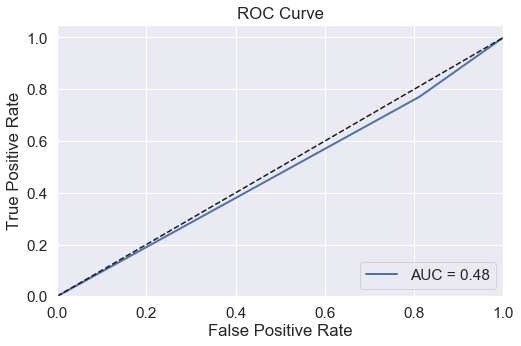

In [27]:
# Plot the ROC curve
ROCCurve(y_test, y_pred)

### 3.4 Support Vector Machine Classifier (SVC)

In [28]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object: pl
pl_svc = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', SVC())
    ])

# Fit to the training data
pl_svc.fit(X_train, y_train)

# Predict the labels
y_pred = pl_svc.predict(X_test)

SVM Classifier 

              precision    recall  f1-score   support

           0       0.55      0.30      0.39       186
           1       0.53      0.77      0.63       192

    accuracy                           0.54       378
   macro avg       0.54      0.53      0.51       378
weighted avg       0.54      0.54      0.51       378



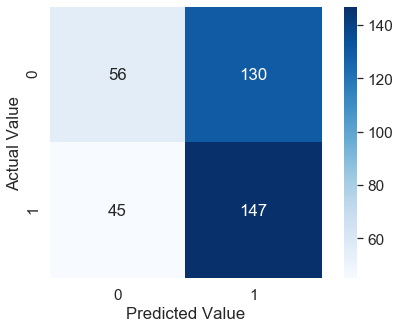

ROC-AUC score: 0.53


In [29]:
Evaluation('SVM Classifier', X_test, y_test, y_pred)

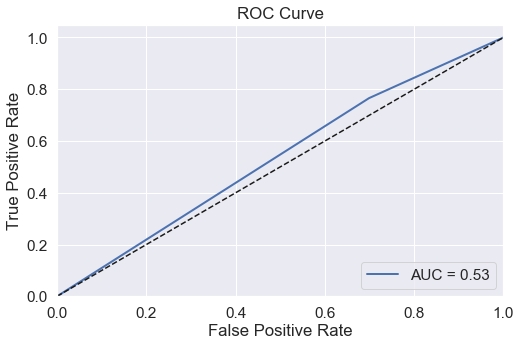

In [30]:
# Plot the ROC curve
ROCCurve(y_test, y_pred)

### 3.5 XGBoost Classifier

In [31]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object
pl_xgb = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', XGBClassifier())
    ])

# Fit to the training data
pl_xgb.fit(X_train, y_train)

# Predict the labels
y_pred = pl_xgb.predict(X_test)

XGBoost 

              precision    recall  f1-score   support

           0       0.50      0.36      0.42       186
           1       0.51      0.66      0.58       192

    accuracy                           0.51       378
   macro avg       0.51      0.51      0.50       378
weighted avg       0.51      0.51      0.50       378



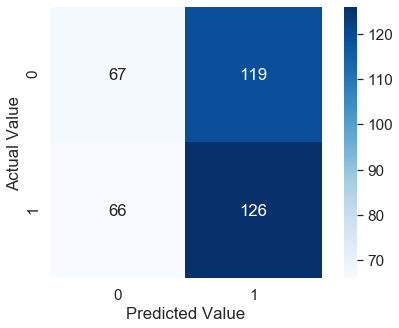

ROC-AUC score: 0.51


In [32]:
Evaluation('XGBoost', X_test, y_test, y_pred)

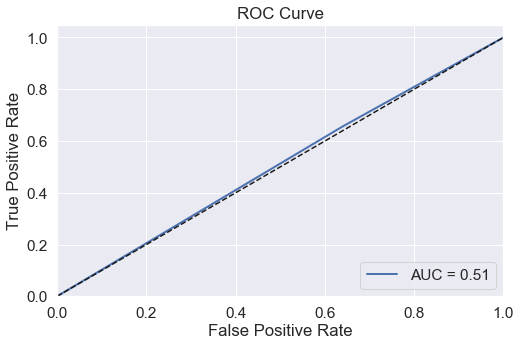

In [33]:
# Plot the ROC curve
ROCCurve(y_test, y_pred)

### 3.6 Bernouilli Naive Bayes

In [34]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object
pl_bnb = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', BernoulliNB())
    ])

# Fit to the training data
pl_bnb.fit(X_train, y_train)

# Predict the labels
y_pred = pl_bnb.predict(X_test)

BernoulliNB 

              precision    recall  f1-score   support

           0       0.46      0.06      0.11       186
           1       0.51      0.93      0.65       192

    accuracy                           0.50       378
   macro avg       0.48      0.50      0.38       378
weighted avg       0.48      0.50      0.39       378



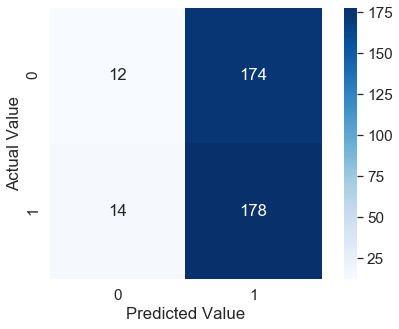

ROC-AUC score: 0.50


In [35]:
Evaluation('BernoulliNB', X_test, y_test, y_pred)

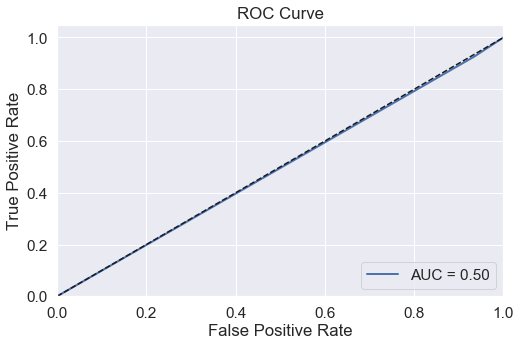

In [36]:
# Plot the ROC curve
ROCCurve(y_test, y_pred)

### 3.7 Deep Learning

The following model architectures of deep learning have been used to predict the DJIA stock movements:
1. Multilayer Perceptron (MLP)
2. Recurrent Nueral Network (RNN) - LSTM
3. Convolutional Neural Network (CNN)

Set random seed to achieve reproducibility.

In [37]:
# Set a seed value
seed_value = 0

# Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
seed(seed_value)

# Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

Before starting building our very first deep learning model, we need to convert all the text data in each row of our dataframe to a collection of documents - single vector.

In [38]:
# Converts all text in each row of train and test sets to single vectors
X_train_combined = combine_text_columns(X_train)
X_test_combined = combine_text_columns(X_test)

### 3.7.1 Multilayer Perceptron (MLP)

Since it is a text data, we need to convert it to a matrix. Hence, we use TfidfVectorizer() from the Scikit-learn library.

In [39]:
# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase=True, min_df =0.01, max_df = 0.7, ngram_range = (2, 2))

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train_combined)

# Transform the test data 
tfidf_test = tfidf_vectorizer.transform(X_test_combined)

print('The shape of train dataset after TfidfVectorizer() --> ', tfidf_train.shape)
print('The shape of test dataset after TfidfVectorizer() --> ', tfidf_test.shape)

The shape of train dataset after TfidfVectorizer() -->  (1611, 3192)
The shape of test dataset after TfidfVectorizer() -->  (378, 3192)


In [40]:
# The target feature has two classes of 0 and 1
nb_classes = 2

# Prepare the data as NumPy matrix
X_train = tfidf_train.toarray()
X_test = tfidf_test.toarray()

y_train = to_categorical(y_train, nb_classes)   # Alternatively, y_train.values should also work if it is numeric type
y_test = to_categorical(y_test, nb_classes)

Standardization can drastically improve the performance of models. Hence, we use MaxAbsScaler() to scale our data to a [-1,1] range based on absolute maximum. This scaler is appropriate for sparse data. 

In [41]:
# Initialize a scaler and fit_transform the data
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Save the number of columns in predictors
n_cols = X_train.shape[1]

In [43]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.2, seed=seed_value))

# Add the second layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2, seed=seed_value))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), validation_split=0.15, verbose=1)

Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 1s 438us/step - loss: 0.6975 - accuracy: 0.5227 - val_loss: 0.6929 - val_accuracy: 0.5106
Epoch 2/10
1611/1611 [==============================] - 0s 294us/step - loss: 0.4818 - accuracy: 0.8194 - val_loss: 0.7846 - val_accuracy: 0.5053
Epoch 3/10
1611/1611 [==============================] - 0s 301us/step - loss: 0.1276 - accuracy: 0.9708 - val_loss: 1.2508 - val_accuracy: 0.5238
Epoch 4/10
1611/1611 [==============================] - 1s 313us/step - loss: 0.0126 - accuracy: 0.9988 - val_loss: 1.7660 - val_accuracy: 0.5212
Epoch 5/10
1611/1611 [==============================] - 0s 310us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.3239 - val_accuracy: 0.5291
Epoch 6/10
1611/1611 [==============================] - 0s 298us/step - loss: 1.3206e-04 - accuracy: 1.0000 - val_loss: 2.8899 - val_accuracy: 0.5344
Epoch 7/10
1611/1611 [==============================] - 0s 306us/step - l

In [44]:
# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test accuracy:', score[1])

378/378 [==============================] - 0s 56us/step
Test accuracy: 0.5158730149269104


In [45]:
y_pred = model.predict_classes(X_test)

In [46]:
y_pred[:5]

array([0, 0, 1, 1, 1], dtype=int64)

MLP 

              precision    recall  f1-score   support

           0       0.51      0.44      0.47       186
           1       0.52      0.59      0.55       192

    accuracy                           0.52       378
   macro avg       0.52      0.51      0.51       378
weighted avg       0.52      0.52      0.51       378



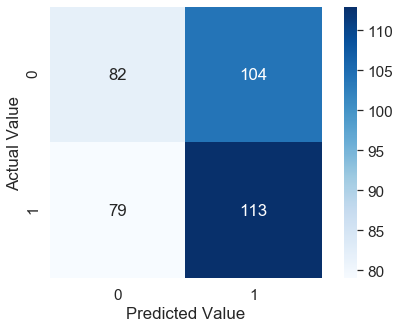

ROC-AUC score: 0.51


In [47]:
Evaluation('MLP', X_test, y_test.argmax(1), y_pred)

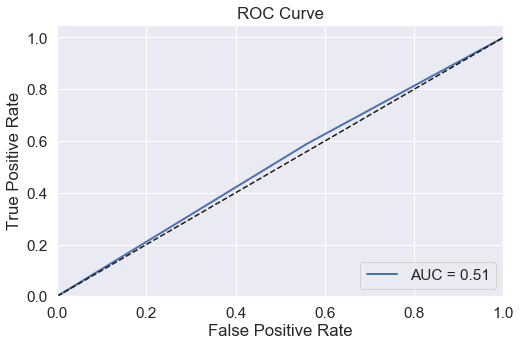

In [48]:
# Plot the ROC curve
ROCCurve(y_test.argmax(1), y_pred)

### 3.7.2 Recurrent Nueral Network (RNN) - LSTM

In [49]:
max_features = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1
maxlen = 200
batch_size = 32

We could use `TfidfVectorizer()` here to vectorize the text data, rather we use `Tokenizer()` from the `Keras API`. It is basically another way of vectorizing text data. 

In [50]:
# Vectorize the text data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train_combined)
X_train = tokenizer.texts_to_sequences(X_train_combined)
X_test = tokenizer.texts_to_sequences(X_test_combined)

Next, we use Keras' `pad_sequences()` function to ensure that all sequences have the same length as the longest sequence.

In [51]:
# Sequence padding
X_train = sequence.pad_sequences(X_train, maxlen=200)
X_test = sequence.pad_sequences(X_test, maxlen=200)

# Y_train = to_categorical(y_train, nb_classes)
# Y_test = to_categorical(y_test, nb_classes)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1611, 200)
X_test shape: (378, 200)


In [52]:
# Set up the model
model = Sequential()

model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test))

Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6913 - accuracy: 0.5282 - val_loss: 0.6948 - val_accuracy: 0.5079
Epoch 2/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6753 - accuracy: 0.6598 - val_loss: 0.6890 - val_accuracy: 0.5556
Epoch 3/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.3455 - accuracy: 0.9100 - val_loss: 0.8796 - val_accuracy: 0.5370
Epoch 4/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.0820 - accuracy: 0.9795 - val_loss: 0.9749 - val_accuracy: 0.5503
Epoch 5/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.0172 - accuracy: 0.9981 - val_loss: 1.2137 - val_accuracy: 0.5767
Epoch 6/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 1.3119 - val_accuracy: 0.5714
Epoch 7/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.0038

In [53]:
# Evaluate the model
score= model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.5820105671882629


In [54]:
y_pred = model.predict_classes(X_test)

LSTM 

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       186
           1       0.59      0.58      0.59       192

    accuracy                           0.58       378
   macro avg       0.58      0.58      0.58       378
weighted avg       0.58      0.58      0.58       378



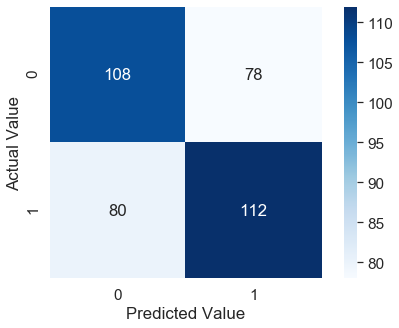

ROC-AUC score: 0.58


In [55]:
Evaluation('LSTM', X_test, y_test.argmax(1), y_pred)

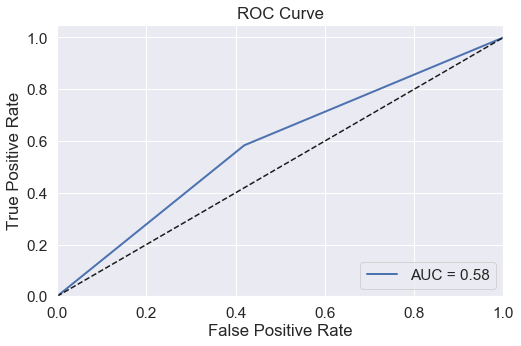

In [56]:
# Plot the ROC curve
ROCCurve(y_test.argmax(1), y_pred)

### 3.7.3 Convolutional Neural Network (CNN)

In [57]:
# Set up the model
model = Sequential()

model.add(Embedding(max_features, 128, dropout=0.2))
# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:
model.add(Convolution1D(filters=120,
                        filter_length=2,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))

def max_1d(X):
    return K.max(X, axis=1)

model.add(Lambda(max_1d, output_shape=(120,)))
model.add(Dense(120, activation='relu')) 
model.add(Dropout(0.2, seed=seed_value))

# Add the output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.5379 - val_loss: 0.6940 - val_accuracy: 0.5079
Epoch 2/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.6729 - accuracy: 0.5506 - val_loss: 0.6959 - val_accuracy: 0.5066
Epoch 3/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.5600 - accuracy: 0.8318 - val_loss: 0.7386 - val_accuracy: 0.5317
Epoch 4/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.1653 - accuracy: 0.9901 - val_loss: 0.9439 - val_accuracy: 0.5291
Epoch 5/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.9638 - val_accuracy: 0.4881
Epoch 6/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.0401 - val_accuracy: 0.5013
Epoch 7/10
1611/1611 [==============================] - 3s 2ms/step - loss: 0.0019 - accu

In [58]:
# Evaluate the model
score= model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.5


In [59]:
y_pred = model.predict_classes(X_test)

CNN 

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       186
           1       0.50      0.66      0.57       192

    accuracy                           0.50       378
   macro avg       0.49      0.49      0.48       378
weighted avg       0.49      0.50      0.48       378



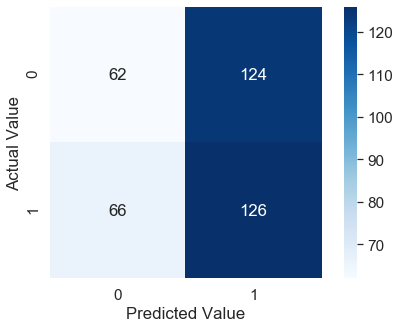

ROC-AUC score: 0.49


In [60]:
Evaluation('CNN', X_test, y_test.argmax(1), y_pred)

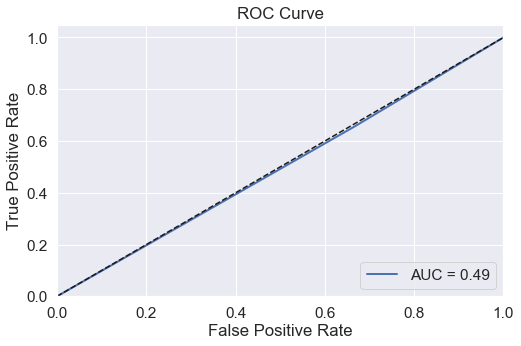

In [61]:
# Plot the ROC curve
ROCCurve(y_test.argmax(1), y_pred)

<a href="#Table-of-Contents">Back to Top</a> <br>

**************

# 4. Model Tuning

Now, we are done with the model building part and ready to perform tuning on the models with the highest AUC score. 

In [62]:
# Prepare a dataframe using all the models with their performance measures
df1=pd.DataFrame(model_evaluation,columns=['Model', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall', 'F1'])
df1.sort_values(['ROC_AUC'],ascending=False,inplace=True)
df1=df1.set_index('Model')
df1

,Accuracy,ROC_AUC,Precision,Recall,F1
Model,,,,,
LSTM,0.582011,0.581989,0.589474,0.583333,0.586387
SVM Classifier,0.537037,0.533350,0.530686,0.765625,0.626866
MLP,0.515873,0.514701,0.520737,0.588542,0.552567
Logistic Regression,0.515873,0.509241,0.512968,0.927083,0.660482
XGBoost,0.510582,0.508233,0.514286,0.656250,0.576659
Multinomial Naive Bayes,0.507937,0.500000,0.507937,1.000000,0.673684
BernoulliNB,0.502646,0.495800,0.505682,0.927083,0.654412
CNN,0.497354,0.494792,0.504000,0.656250,0.570136
Random Forest Classifier,0.484127,0.479503,0.494983,0.770833,0.602851


First, we run the SVM algorithm again here and then perform the tuning for some of the important hyper-parameters.

In [63]:
# Extract the train and test sets
y_train_svc = train['Label']
X_train_svc = train.drop('Label', axis=1)

y_test_svc = test['Label']
X_test_svc = test.drop('Label', axis=1)


# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Instantiate Pipeline object: pl
pl_svc = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', CountVectorizer(analyzer=text_preprocess, ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('dim_red', SelectKBest(chi2, chi_k)),
        ('classifier', SVC())
    ])

# Fit to the training data
pl_svc.fit(X_train_svc, y_train_svc)

Pipeline(memory=None,
         steps=[('selector',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function combine_text_columns at 0x000001DAF3913438>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('vectorizer',
                 CountVectorizer(analyzer=<function text_preprocess at 0x000001DAF3913288>,
                                 binary=False, decode_error='strict',
                                 dtype=<cla...
                                  sublinear_tf=False, use_idf=True)),
                ('dim_red',
                 SelectKBest(k=10000,
                             score_func=<function chi2 at 0x000001DAECD98048>)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr',

In [64]:
# Setup the hyperparameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1], 
    'classifier__kernel': ['rbf', 'poly', 'sigmoid'] 
}

# Instantiate the GridSearchCV object
clf = GridSearchCV(pl_svc, param_grid, cv=2, verbose=1, n_jobs=-1)

# Fit it to the data
clf.fit(X_train_svc, y_train_svc)
       
# Print the tuned parameters and score
print("Best Parameters: {}".format(clf.best_params_)) 
print("Best score is {}".format(clf.best_score_))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 71.9min finished


Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
Best score is 0.5418992648305412


The following section shows how to tune a deep learning model. However, due to the unstability in predicting stock movements, it does not yield a sensible value. 

In [65]:
max_features = 20000
EMBEDDING_DIM = 100

def get_new_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, dropout=0.2))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
    model.add(Dense(2, activation='softmax'))
    return model

In [66]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = Adam(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Testing model with learning rate: 0.000001

Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6929 - accuracy: 0.5003 - val_loss: 0.6934 - val_accuracy: 0.4947
Epoch 2/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6927 - accuracy: 0.5140 - val_loss: 0.6934 - val_accuracy: 0.4974
Epoch 3/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6926 - accuracy: 0.5351 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6934 - val_accuracy: 0.5026
Epoch 5/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6934 - val_accuracy: 0.5079
Epoch 6/10
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6926 - accuracy: 0.5289 - val_loss: 0.6934 - val_accuracy: 0.5053
Epoch 7/10
1611/1611 [===============

In [67]:
# Set up the model
model = Sequential()

model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
                                       
# Fit the model
model.fit(X_train, y_train, epochs=15, 
          validation_data=(X_test, y_test), validation_split=0.3,
          callbacks=[early_stopping_monitor])

Train on 1611 samples, validate on 378 samples
Epoch 1/15
1611/1611 [==============================] - 10s 6ms/step - loss: 0.6991 - accuracy: 0.5152 - val_loss: 0.6928 - val_accuracy: 0.4974
Epoch 2/15
1611/1611 [==============================] - 10s 6ms/step - loss: 0.4333 - accuracy: 0.8318 - val_loss: 0.9091 - val_accuracy: 0.5344
Epoch 3/15
1611/1611 [==============================] - 10s 6ms/step - loss: 0.1098 - accuracy: 0.9559 - val_loss: 1.4042 - val_accuracy: 0.5397


In [68]:
# Evaluate the model
score= model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.5396825671195984


<a href="#Table-of-Contents">Back to Top</a> <br>

# 5. Conclusion

In this project, we attempted to predict the DJIA stock movements using the historical news headlines extracted from the Reddit. The highest accuracy score that we obtained from our models was 58%. There are many factors affecting the accuracy score for stock predictions. First of all, we have limited data which affects the performance of the models. Therefore, adding more data would increase the performance of the models in predicting the DJIA stock movements. Also, the stock prediction itself is a very difficult task and is affected from a variety of factors. Considering the difficulty of predicting stock movements and under these limitations, overall, our models did pretty good in predicting the stock movements of the Dow Jones.

<a href="#Table-of-Contents">Back to Top</a> <br>